## Week 14: Lecture 1

We have been studying regression. We use known properties of a sample to predict unknown properties of a sample. Here we try to pass from known information to unknown information. For regression we need to fit a line to the data in a scatter-plot. We use least squares to determine the 

- slope 
- intercept 

of the line. Here we try to minimize the residuals meaning the difference between observed values and predicted values. Following an exploration of the formulas for slope and intercept, we will study some properties of the predictions and the residuals to better understand the least squares approach.

In [34]:
# importing some packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# changing some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# some helpful functions we wrote for you

from helper_functions import *
from IPython.display import Image

### Exercise (Regression)

Cryptocurrencies are online currencies. The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

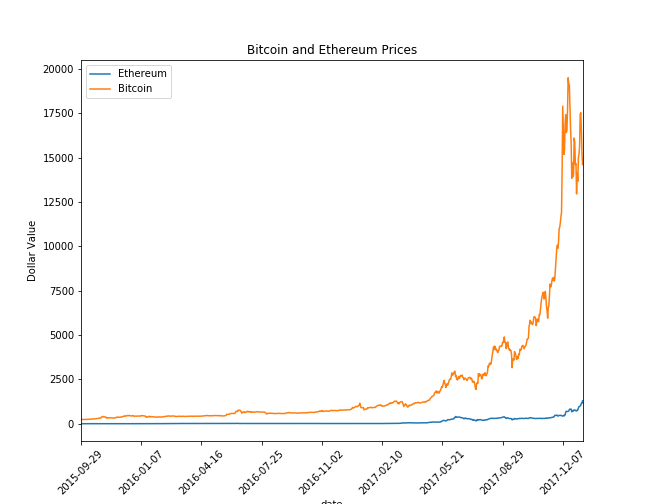

In [2]:
Image("btc_eth.png")

Suppose we want to predict the price of ETH at some point in time based on the price of BTC. Below, we two tables called `btc` and `eth`. Each has 5 columns:

* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [3]:
btc = pd.read_csv('btc.csv')
btc

,date,open,close,market,day
0,2015-09-29,239.02,236.69,3505090000,1
1,2015-09-30,236.64,236.06,3471280000,2
2,2015-10-01,236.00,237.55,3462800000,3
3,2015-10-02,237.26,237.29,3482190000,4
4,2015-10-03,237.20,238.73,3482100000,5
...,...,...,...,...,...
830,2018-01-06,17462.10,17527.00,293091000000,831
831,2018-01-07,17527.30,16477.60,294222000000,832
832,2018-01-08,16476.20,15170.10,276612000000,833
833,2018-01-09,15123.70,14595.40,253935000000,834


In [4]:
eth = pd.read_csv('eth.csv')
eth

,date,open,close,market,day
0,2015-09-29,0.579414,0.661146,42607700,1
1,2015-09-30,0.661192,0.738644,48636600,2
2,2015-10-01,0.734307,0.690215,54032300,3
3,2015-10-02,0.683732,0.678574,50328700,4
4,2015-10-03,0.678783,0.687171,49981900,5
...,...,...,...,...,...
830,2018-01-06,995.150000,1041.680000,96326500000,831
831,2018-01-07,1043.010000,1153.170000,100981000000,832
832,2018-01-08,1158.260000,1148.530000,112164000000,833
833,2018-01-09,1146.000000,1299.740000,110999000000,834


Before we make any predictions, we should understand the association between the cryptocurrencies. We should generate a scatter-plot to show the trend and pattern in the data. 

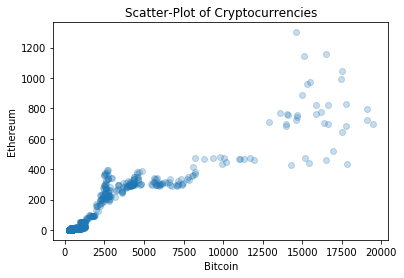

In [5]:
plt.scatter(btc['open'], eth["open"], alpha = 0.25)

plt.xlabel("Bitcoin")
plt.ylabel("Ethereum")
plt.title("Scatter-Plot of Cryptocurrencies");

Note that we have different scales

- Bitcoin values have 4 to 5 digits 
- Ethereum values have 3 to 4 digits

Remember that we can convert to standard units to help visualize the data on the same scale

In [6]:
def transform_to_standard_units(array):
    return (array - np.mean(array)) / np.std(array)

We subtract the mean and divide by the standard deviation.

In [7]:
btc_standard_units = transform_to_standard_units(btc["open"])
eth_standard_units = transform_to_standard_units(eth["open"])

We can combine the transformed numbers into a table.

In [8]:
cryptocurrencies_standard_units = pd.DataFrame(data = { "Bitcoin" : btc_standard_units, "Ethereum" : eth_standard_units})
cryptocurrencies_standard_units

,Bitcoin,Ethereum
0,-0.565635,-0.594975
1,-0.566319,-0.594544
2,-0.566503,-0.594158
3,-0.566141,-0.594425
4,-0.566158,-0.594451
...,...,...
830,4.382294,4.652136
831,4.401025,4.904634
832,4.099059,5.512664
833,3.710507,5.447984


Note that the trend and patterns appear the same in standard units.

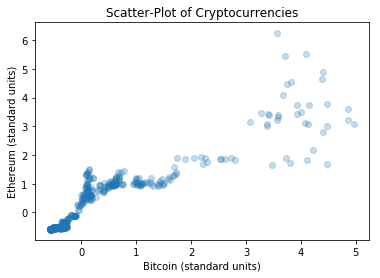

In [9]:
plt.scatter(cryptocurrencies_standard_units['Bitcoin'], cryptocurrencies_standard_units["Ethereum"], alpha = 0.25)

plt.xlabel("Bitcoin (standard units)")
plt.ylabel("Ethereum (standard units)")
plt.title("Scatter-Plot of Cryptocurrencies");

So we should try to grouping together the records in the dataset.

In [10]:
grouped_currencies = summarize_groups(cryptocurrencies_standard_units, 5)
grouped_currencies

,Median of Bitcoin Price,Mean of Ethereum Price
Cryptocurrencies,,
"(-0.572, 0.539]",-0.447357,-0.336487
"(0.539, 1.644]",0.739703,1.054359
"(1.644, 2.75]",2.120206,1.705518
"(2.75, 3.855]",3.559582,3.409133
"(3.855, 4.961]",4.304396,3.375948


Now we can plot all of the data in one chart.

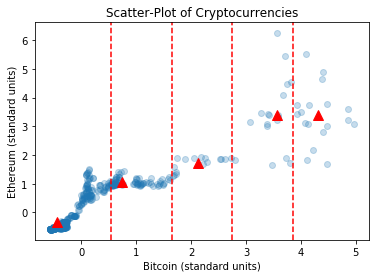

In [11]:
plt.scatter(cryptocurrencies_standard_units['Bitcoin'], cryptocurrencies_standard_units["Ethereum"], alpha = 0.25)
plt.plot(grouped_currencies["Median of Bitcoin Price"], grouped_currencies["Mean of Ethereum Price"], "r^", markersize = 10, lw = 3) 

for group in grouped_currencies.index[1:]:
    plt.axvline(x = group.left, color = "red", linestyle = "dashed")

plt.xlabel("Bitcoin (standard units)")
plt.ylabel("Ethereum (standard units)")
plt.title("Scatter-Plot of Cryptocurrencies");

By summarizing the data in the 5 groups, we can determine the pattern and trend. We find a postive trend meaning that Bitcoin and Ethereum prices move in the same direction. We find a linear shape. However it appears that we have some outliers.

Having transformed to standard units, we can compute the correlation.

In [12]:
x = cryptocurrencies_standard_units["Bitcoin"]
y = cryptocurrencies_standard_units["Ethereum"]

product = x * y

r = np.mean(product)
r

0.9250325764148274

We can compare to the `pandas` function `corr`.

In [13]:
cryptocurrencies_standard_units.corr()

,Bitcoin,Ethereum
Bitcoin,1.000000,0.925033
Ethereum,0.925033,1.000000


Remember that the correlation gives us a guess for the slope of the line that connects the data in the scatter-plot.

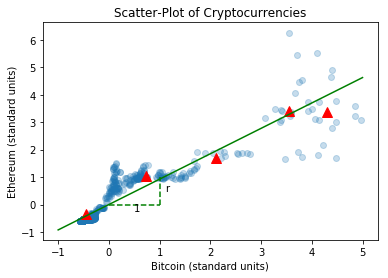

In [14]:
plt.scatter(cryptocurrencies_standard_units['Bitcoin'], cryptocurrencies_standard_units["Ethereum"], alpha = 0.25)
plt.plot(grouped_currencies["Median of Bitcoin Price"], grouped_currencies["Mean of Ethereum Price"], "r^", markersize = 10, lw = 3) 

slope = 0.925
x_values = np.linspace(-1,5,100)
y_values = slope * x_values

plt.plot(x_values, y_values, "g")

plt.hlines(y=0, xmin=0, xmax = 1, color = "green", linestyle ="dashed")
plt.vlines(x=1, ymin=0, ymax = 1, color = "green", linestyle ="dashed")
plt.text(0.5, -0.25, "1")
plt.text(1.1, 0.5, "r")

plt.xlabel("Bitcoin (standard units)")
plt.ylabel("Ethereum (standard units)")
plt.title("Scatter-Plot of Cryptocurrencies");

If we want to convert to the original units, then we need to remember that 

$$\left( \displaystyle \frac{y - \text{mean y}}{\text{standard deviation y}}  \right)  = \text{correlation} \cdot \left( \displaystyle \frac{x - \text{mean x}}{\text{standard deviation x}}  \right)  $$

inplies 

$$\begin{align} 
\hat{y} = \text{intercept} + \text{slope} \cdot \text{x}
\end{align}$$

where

$$\text{slope} = \displaystyle \frac{\text{correlaton} \cdot \text{standard deviation y}}{\text{standard deviation x}} $$

and 

$$\text{intercept} = \text{mean y} - \text{slope} \cdot \text{mean x}$$

Here $\hat{y}$ denotes the prediction for the observed value $y$.

In [15]:
correlation = r

mean_x = np.mean(btc["open"])
mean_y = np.mean(eth["open"])


standard_deviation_x = np.std(btc["open"])
standard_deviation_y = np.std(eth["open"])

slope = (correlation * standard_deviation_y) / standard_deviation_x
intercept = mean_y - slope * mean_x

Using mean, standard deviation and correlation, we computed the slope and intercept.

In [16]:
print(f"The slope of the best fit line is {slope}")
print(f"The intercept of the best fit line is {intercept}")

The slope of the best fit line is 0.05037151462996944
The intercept of the best fit line is 2.1384390569067477


Now we can plot in the original units to obtain a fit to the data.

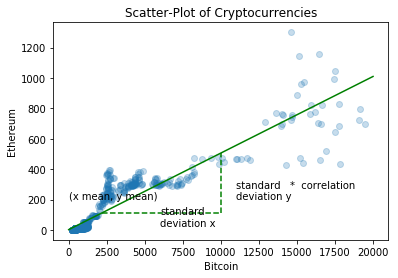

In [17]:
plt.scatter(btc['open'], eth["open"], alpha = 0.25)

x_values = np.linspace(0,20000,1000)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, "g")

plt.hlines(y=mean_y, xmin=mean_x, xmax = 10000, color = "green", linestyle ="dashed")
plt.vlines(x=10000, ymin=mean_y, ymax = slope * 10000 + intercept, color = "green", linestyle ="dashed")

plt.text(0.0, 200, "(x mean, y mean)")
plt.text(6000, 25, "standard\ndeviation x")
plt.text(11000, 200, "standard   *  correlation\ndeviation y")

plt.xlabel("Bitcoin")
plt.ylabel("Ethereum")
plt.title("Scatter-Plot of Cryptocurrencies");

### Example (Outliers)

Remember that outliers affect correlation. We appear to have some large value of Bitcoin prices. We learned from the standard deviation bound that that at least   

- $1 - \frac{1}{1^2} = 0.0$ of the data within 1 standard deviations
- $1 - \frac{1}{2^2} = 0.75$ of the data within 2 standard deviations
- $1 - \frac{1}{3^2} \approx 0.89$ of the data within 3 standard deviations

Here we measure distance in standard units

$$\left|\displaystyle \frac{\text{Bitcoin Price} - \text{Mean}}{\text{Standard Deviation}}\right| \leq z$$

where $z = 1,2,3$. 

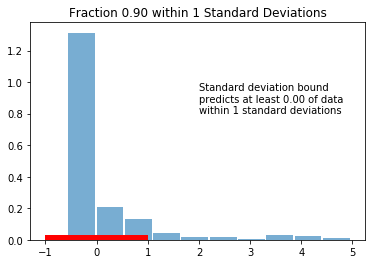

In [18]:
plot_standard_deviation_bounds(cryptocurrencies_standard_units["Bitcoin"], 1)

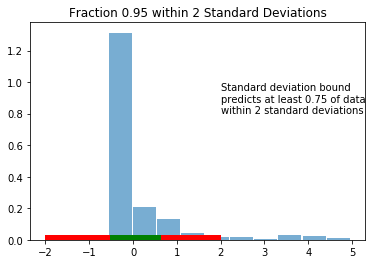

In [19]:
plot_standard_deviation_bounds(cryptocurrencies_standard_units["Bitcoin"], 2)

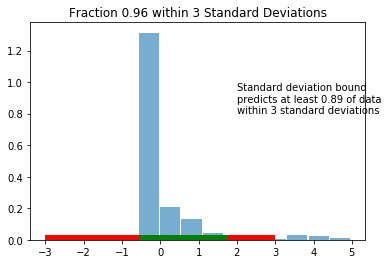

In [20]:
plot_standard_deviation_bounds(cryptocurrencies_standard_units["Bitcoin"], 3)

If we limit to 1 standard deviations, then we still have 90% of the data. 

In [21]:
true_and_false_values = cryptocurrencies_standard_units["Bitcoin"] <= 1
cryptocurrencies_standard_units_without_outliers = cryptocurrencies_standard_units[true_and_false_values]

What is the correlation between Bitcoin and Ethereum without the outliers?

In [22]:
cryptocurrencies_standard_units_without_outliers.corr()

,Bitcoin,Ethereum
Bitcoin,1.000000,0.943336
Ethereum,0.943336,1.000000


Note that the correlation is higher. 

### Example (Residuals)


Remember that we want to predict Ethereum price from Bitcoin price.

In [35]:
regression_widget(btc, eth)

interactive(children=(FloatSlider(value=0.05, description='slope', max=0.07, min=0.01, step=0.01), FloatSlider…

We have the following observed values for Ethereum.

In [24]:
observed = eth["open"]
observed

0         0.579414
1         0.661192
2         0.734307
3         0.683732
4         0.678783
          ...     
830     995.150000
831    1043.010000
832    1158.260000
833    1146.000000
834    1300.340000
Name: open, Length: 835, dtype: float64

We have the following predicted values for Bitcoin.

In [25]:
predicted = intercept + slope * btc["open"]
predicted

0       14.178238
1       14.058354
2       14.026117
3       14.089585
4       14.086562
          ...    
830    881.730865
831    885.015087
832    832.069588
833    763.942115
834    736.983280
Name: open, Length: 835, dtype: float64

##### Means of Observed and Predicted

What is the connection between the means? The mean of the observed is

In [26]:
print("Mean of observed {}".format(np.mean(observed)))
print("Mean of predicted {}".format(np.mean(predicted)))

Mean of observed 113.35478844191617
Mean of predicted 113.35478844191618


We learn that the values are equal

$$\text{Mean of Predicted} = \text{Mean of Observed}$$

So on average the predicted value equals the observed value.

##### Standard Deviation of Observed and Predicted

Remember that 

$$\text{Variance} = \text{Standard Deviation}^2$$

What is the relationship between the variance of the observed and predicted values?

In [27]:
print("Variance of observed {}".format(np.std(observed)**2))
print("Variance of predicted {}".format(np.std(predicted)**2))

Variance of observed 35927.804830936795
Variance of predicted 30742.89328488463


We can use correlation to relate the two values

In [28]:
r**2 * np.std(observed)**2

30742.89328488462

We learn that 

$$\text{Variance of Predicted} = r^2 \cdot \text{Variance of Observed}$$

Remember that $-1 \leq r \leq 1$. So the variance of the predicted values cannot be greater than the variance of the observed values. This observation is called regression to the mean.

##### Mean of Residuals

Remember that the residuals are

$$\text{Observed} - \text{Predicted}$$

What is the mean of the residuals?

In [29]:
np.mean(observed - predicted)

-6.616982411102441e-14

We learn that the mean of the residuals is 0 
$$\text{Mean of Residuals} = 0$$

So even with inaccurate predictions, the errors on average are 0.

##### Standard Deviation of Residuals

What is the variance of the residuals?

In [30]:
np.std(observed - predicted)**2

5184.9115460521425

How can we relate the number to the variance of the observed values and the variance of the predicted values?

In [31]:
np.std(observed)**2 - np.std(predicted)**2

5184.911546052164

We learn that 

$$\text{Variance of Residuals} = \text{Variance of Observed} - \text{Variance of Predicted}$$

Remember that variance like standard deviation cannot be a negative number. So the variance of the residuals measures the decrease in variance from observations to predictions. Rearranging we obtain

$$\text{Variance of Observed} = \text{Variance of Residual} + \text{Variance of Predicted}$$

Plugging in the relationship between variance of observations and variance of predictions, we obtain

$$\text{Variance of Observed} = \text{Variance of Residual} + r^2 \text{Variance of Observed}$$

So we obtain 

$$r^2 = 1 - \displaystyle \frac{\text{Variance of Residual} }{\text{Variance of Observed}}$$

In [32]:
formula = 1 - (np.std(predicted - observed)**2 / np.std(observed)**2)

print("Value of r^2 {}".format(r**2))
print("Value of Formula {}".format(formula))

Value of r^2 0.8556852674286535
Value of Formula 0.8556852674286544


We should interpret the numerator as

$$\text{Variance of Residual} = \text{Difference in Observed and Predicted Fitting the Data with a Line}$$

We should interpret the denominator as

$$\text{Variance of Observed} = \text{Difference in Observed and Predicted Fitting the Data with a Number}$$

So $r$ tells us the improvement in accuracy.

##### Plotting Residuals

We can make a scatter-plot of the residuals.

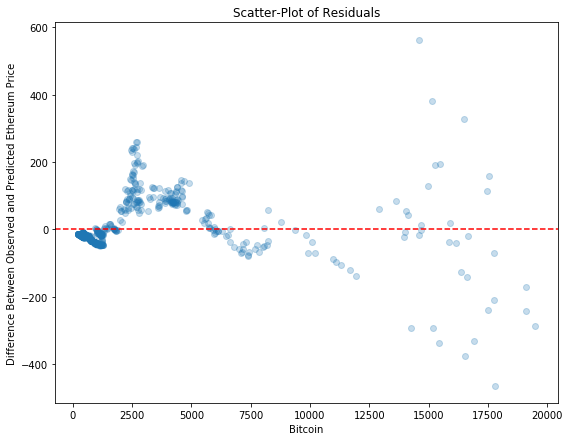

In [36]:
plt.scatter(btc['open'], observed - predicted, alpha = 0.25)

plt.axhline(y=0, color = "red", linestyle ="dashed")

plt.xlabel("Bitcoin")
plt.ylabel("Difference Between Observed and Predicted Ethereum Price")
plt.title("Scatter-Plot of Residuals");

We should not see a pattern in the scatter-plot of the residuals.